In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airline Passenger Satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.drop(['id','Unnamed: 0'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# Expolarity Data Analysis

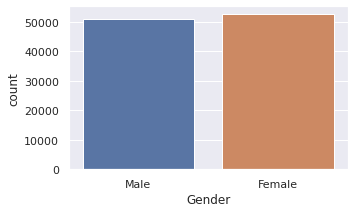

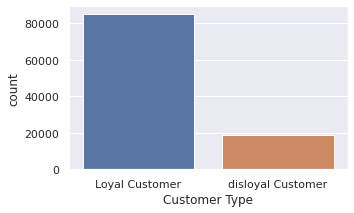

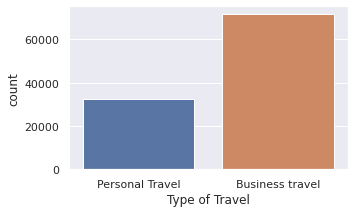

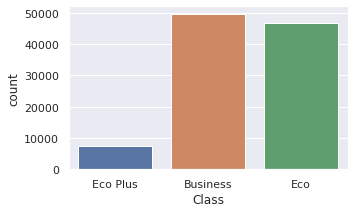

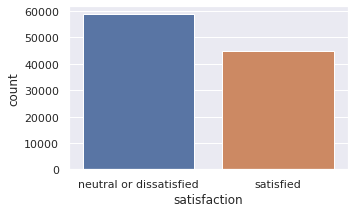

In [82]:
numeric_df = df.select_dtypes(['float', 'int'])
categorical_df = df.select_dtypes('object')

sns.set(rc={'figure.figsize':(4,2)})
for i in categorical_df.columns:
  for j in range(categorical_df.shape[1]):
    ax = plt.subplot(3, 3, j + 1)
    sns.countplot(categorical_df[i])
    plt.show()

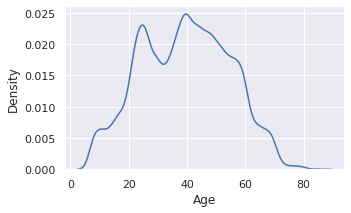

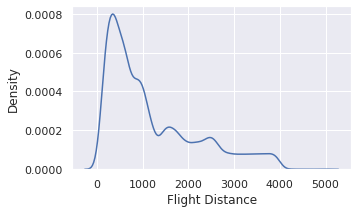

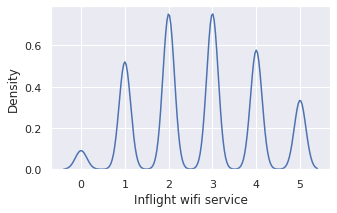

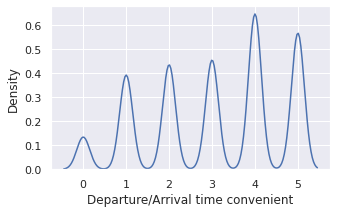

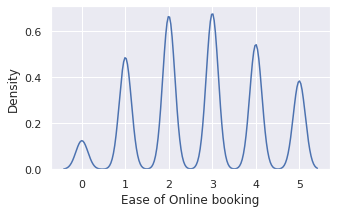

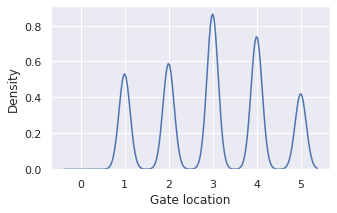

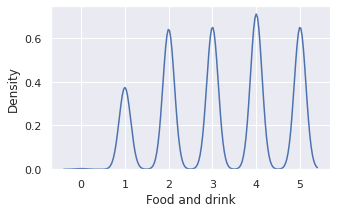

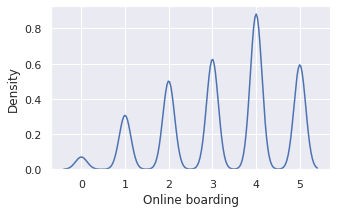

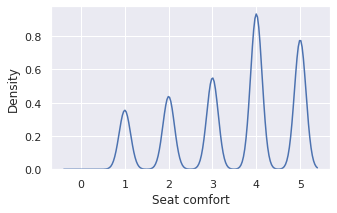

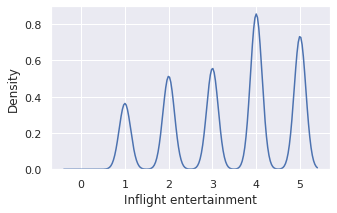

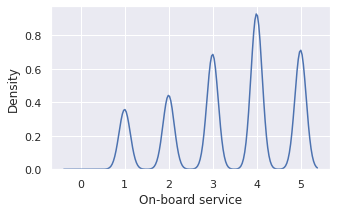

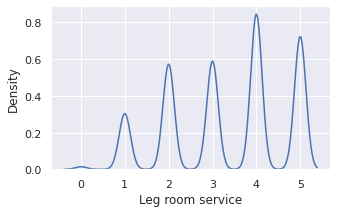

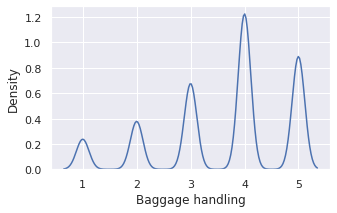

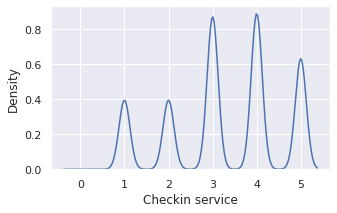

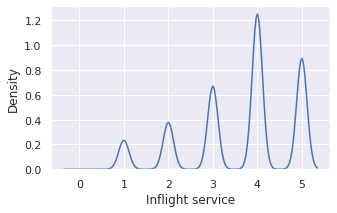

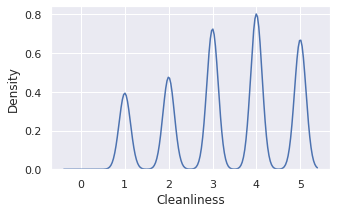

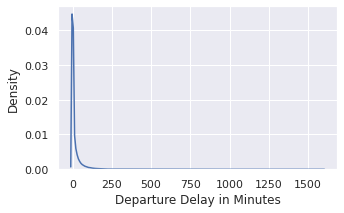

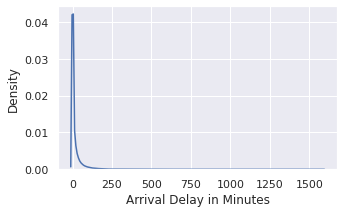

In [84]:
for i in numeric_df.columns:
  sns.kdeplot(numeric_df[i])
  plt.show()

In [97]:
categoric = [
              "Cleanliness", "Inflight service",  "Checkin service", 
             "Baggage handling", "Leg room service", 
             "On-board service", "Inflight entertainment", "Seat comfort", "Online boarding", 
             "Food and drink", "Gate location", "Ease of Online booking", "Departure/Arrival time convenient",
             "Inflight wifi service"
             ]

categorical_df[categoric] = df[categoric].astype("category")
categorical_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Gender,Customer Type,Type of Travel,Class,satisfaction,Cleanliness,Inflight service,Checkin service,Baggage handling,Leg room service,On-board service,Inflight entertainment,Seat comfort,Online boarding,Food and drink,Gate location,Ease of Online booking,Departure/Arrival time convenient,Inflight wifi service
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,5,5,4,4,3,4,5,5,3,5,1,3,4,3
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,1,4,1,3,5,1,1,1,3,1,3,3,2,3
2,Female,Loyal Customer,Business travel,Business,satisfied,5,4,4,4,3,4,5,5,5,5,2,2,2,2
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,2,4,1,3,5,2,2,2,2,2,5,5,5,2
4,Male,Loyal Customer,Business travel,Business,satisfied,3,3,3,4,4,3,3,5,5,4,3,3,3,3


# Feature Selection with Statistics (correlation and chi - square test)

In [98]:

numeric_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


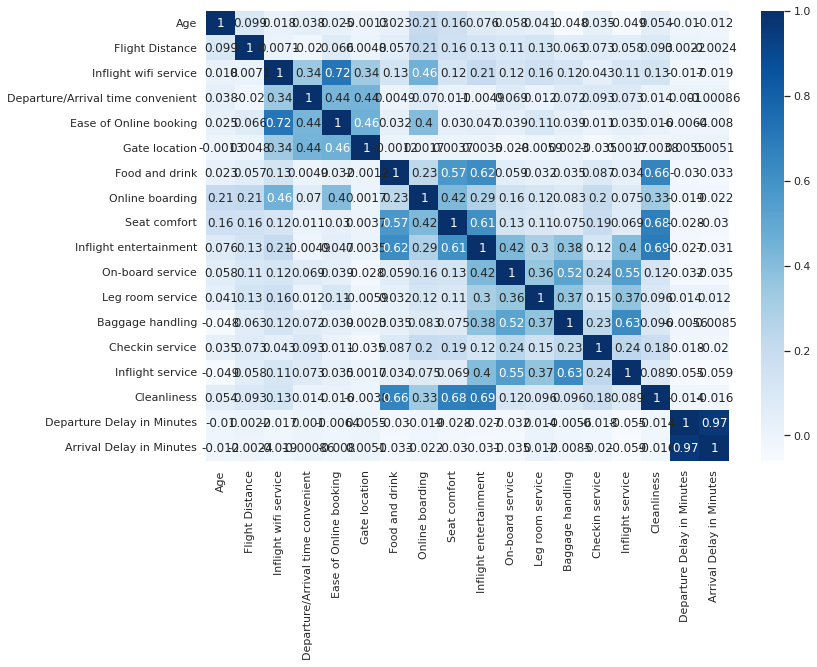

In [99]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

cor_df = numeric_df.corr()

sns.heatmap(cor_df, annot = True, cmap = 'Blues')
plt.show()

In [100]:
from itertools import combinations

In [101]:
comb = list(combinations(numeric_df.columns, 2))
binary_selection = []
for i in comb:
  binary_selection.append(list(i))


In [102]:

clean_column = []
for i in binary_selection:
  if numeric_df[i].corr().iloc[0,1] > 0.65:
      clean_column.append(i[1])

clean_column = list(dict.fromkeys(clean_column))
clean_column

['Ease of Online booking', 'Cleanliness', 'Arrival Delay in Minutes']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


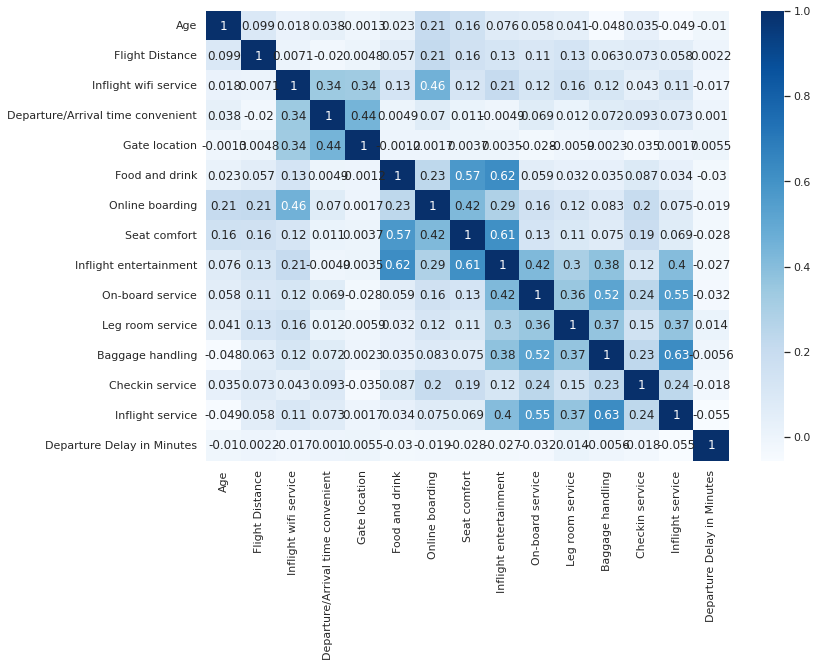

In [103]:
numeric_df.drop(clean_column, axis = 1, inplace = True)
cor_df = numeric_df.corr()

sns.heatmap(cor_df, annot = True, cmap = 'Blues')
plt.show()

In [104]:

categorical_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Cleanliness,Inflight service,Checkin service,Baggage handling,Leg room service,On-board service,Inflight entertainment,Seat comfort,Online boarding,Food and drink,Gate location,Ease of Online booking,Departure/Arrival time convenient,Inflight wifi service
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,5,5,4,4,3,4,5,5,3,5,1,3,4,3
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,1,4,1,3,5,1,1,1,3,1,3,3,2,3
2,Female,Loyal Customer,Business travel,Business,satisfied,5,4,4,4,3,4,5,5,5,5,2,2,2,2
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,2,4,1,3,5,2,2,2,2,2,5,5,5,2
4,Male,Loyal Customer,Business travel,Business,satisfied,3,3,3,4,4,3,3,5,5,4,3,3,3,3


In [105]:
comb2 = list(combinations(categorical_df.columns, 2))
binary_selection2 = []
for i in comb2:
  binary_selection2.append(list(i))


[['Gender', 'Customer Type'],
 ['Gender', 'Type of Travel'],
 ['Gender', 'Class'],
 ['Gender', 'satisfaction'],
 ['Gender', 'Cleanliness'],
 ['Gender', 'Inflight service'],
 ['Gender', 'Checkin service'],
 ['Gender', 'Baggage handling'],
 ['Gender', 'Leg room service'],
 ['Gender', 'On-board service'],
 ['Gender', 'Inflight entertainment'],
 ['Gender', 'Seat comfort'],
 ['Gender', 'Online boarding'],
 ['Gender', 'Food and drink'],
 ['Gender', 'Gate location'],
 ['Gender', 'Ease of Online booking'],
 ['Gender', 'Departure/Arrival time convenient'],
 ['Gender', 'Inflight wifi service'],
 ['Customer Type', 'Type of Travel'],
 ['Customer Type', 'Class'],
 ['Customer Type', 'satisfaction'],
 ['Customer Type', 'Cleanliness'],
 ['Customer Type', 'Inflight service'],
 ['Customer Type', 'Checkin service'],
 ['Customer Type', 'Baggage handling'],
 ['Customer Type', 'Leg room service'],
 ['Customer Type', 'On-board service'],
 ['Customer Type', 'Inflight entertainment'],
 ['Customer Type', 'Seat 

In [106]:
pd.crosstab(categorical_df['Class'], categorical_df['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,15185,34480
Eco,38044,8701
Eco Plus,5650,1844


In [107]:
from  scipy import stats

In [108]:
clean_column2 = []
for i in binary_selection2:
  table = pd.crosstab(categorical_df[i[0]], categorical_df[i[1]])
  test, p, sd, xp = stats.chi2_contingency(table, correction = False)
  if p > 0.05:
      clean_column2.append(i[1])

clean_column2

['Inflight entertainment', 'Gate location', 'Ease of Online booking']

In [114]:
clean_column.extend(clean_column2)
clean_column = list(dict.fromkeys(clean_column))
clean_column

['Ease of Online booking',
 'Cleanliness',
 'Arrival Delay in Minutes',
 'Inflight entertainment',
 'Gate location']

# Machine Learning Model

In [148]:
clean_df = df.drop(clean_column, axis = 1)
clean_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,5,3,5,4,3,4,4,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,1,3,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,4,3,4,4,4,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,5,3,1,4,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,4,4,3,3,0,satisfied


In [145]:
clean_df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, average_precision_score, cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from  xgboost import  XGBClassifier
from lightgbm import LGBMClassifier


In [151]:
clean_df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [150]:
clean_df['satisfaction'] = np.where(clean_df['satisfaction'] == 'neutral or dissatisfied', 0, 1 )

df_clean = pd.get_dummies(clean_df, drop_first = True)

Y = df_clean['satisfaction']

X = df_clean.drop('satisfaction', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

print(X_train.shape, X_test.shape)

(77928, 18) (25976, 18)


In [152]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [153]:
def mod (model):

    aps = (cross_val_score(model, X_train_sc, y_train, cv=5, scoring = make_scorer(average_precision_score))).mean()
    kappa =(cross_val_score(model, X_train_sc, y_train, cv=5, scoring = make_scorer(cohen_kappa_score))).mean()
    F1 = (cross_val_score(model, X_train_sc, y_train, cv=5, scoring = make_scorer(f1_score))).mean()
    ps = (cross_val_score(model, X_train_sc, y_train, cv=5, scoring = make_scorer(precision_score))).mean()
    recal = (cross_val_score(model, X_train_sc, y_train, cv=5, scoring = make_scorer(recall_score))).mean()
    auc = (cross_val_score(model, X_train_sc, y_train, cv=5, scoring = make_scorer(roc_auc_score))).mean()
    mcc = (cross_val_score(model, X_train_sc, y_train, cv=5, scoring = make_scorer(matthews_corrcoef))).mean()
    
    return (aps, kappa, F1, ps, recal, auc, mcc)

In [154]:
models = []
models.append(('LogRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RandomForesst', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('Xgboost', XGBClassifier()))
models.append(('Lgbm', LGBMClassifier()))

models

[('LogRegression', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('RandomForesst', RandomForestClassifier()),
 ('GBC', GradientBoostingClassifier()),
 ('Xgboost', XGBClassifier()),
 ('Lgbm', LGBMClassifier())]

In [156]:
model_name = []
model_metrics = []

for i in models:
    model_name.append(i[0])
    model_metrics.append(mod(i[1]))

In [159]:
model_name

['LogRegression', 'KNN', 'LDA', 'RandomForesst', 'GBC', 'Xgboost', 'Lgbm']

In [160]:
final = pd.DataFrame(model_metrics, 
                      columns = ['APS', 'Kappa', 'F1', 'PS', 'Recal', 'Auc', 'Mcc'], 
                      index = model_name)
final

,APS,Kappa,F1,PS,Recal,Auc,Mcc
LogRegression,0.795978,0.740234,0.851012,0.867140,0.835489,0.868555,0.740633
KNN,0.883272,0.843309,0.908395,0.950299,0.870039,0.917534,0.845723
LDA,0.789422,0.733146,0.847641,0.858484,0.837083,0.865517,0.733335
RandomForesst,0.936077,0.917386,0.952866,0.969631,0.935832,0.956818,0.918043
GBC,0.900096,0.875066,0.928432,0.944522,0.912887,0.935837,0.875457
Xgboost,0.898536,0.872279,0.926719,0.944811,0.909314,0.934243,0.872770
Lgbm,0.938473,0.920225,0.954237,0.972621,0.936540,0.958137,0.920729


In [161]:
best_model = LGBMClassifier().fit(X_train_sc, y_train)
best_model.score(X_test_sc, y_test)

0.960655990144749